# Preprocessing des datasets

Suite aux conclusions tirées de notre analyse du dataset, nous allons nettoyer
le dataset pour éviter qu'il ne soit polluer.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.preprocessing import (
    balance_dataset,
    get_class_distribution,
    save_balanced_datasets
)

## Chargement des donnees originales

In [2]:
flow_data = pd.read_pickle('../data/flow_data.pkl')
packet_data = pd.read_pickle('../data/packet_data.pkl')

print(f"Flow Data original   : {len(flow_data):,} lignes")
print(f"Packet Data original : {len(packet_data):,} lignes")

Flow Data original   : 2,226,541 lignes
Packet Data original : 2,855,439 lignes


## Verification des valeurs manquantes

In [3]:
print("FLOW DATA - Valeurs manquantes")
missing_flow = flow_data.isna().sum()
missing_flow = missing_flow[missing_flow > 0]

if len(missing_flow) > 0:
    print(f"Colonnes avec NaN: {len(missing_flow)}")
    print(missing_flow.head(10))
else:
    print("Aucune valeur manquante")

FLOW DATA - Valeurs manquantes
Colonnes avec NaN: 1
Flow Bytes/s    6941
dtype: int64


In [4]:
print("PACKET DATA - Valeurs manquantes")
missing_packet = packet_data.isna().sum()
missing_packet = missing_packet[missing_packet > 0]

if len(missing_packet) > 0:
    print(f"Colonnes avec NaN: {len(missing_packet)}")
    print(missing_packet.head(10))
else:
    print("Aucune valeur manquante")

PACKET DATA - Valeurs manquantes
Colonnes avec NaN: 49
src_ip                36731
dst_ip                36731
dns_query_type      2833264
jitter              1090208
stream_1_var        1238337
src_ip_1_count        36731
src_ip_1_mean         36731
src_ip_1_var          99138
src_ip_mac_1_var      82326
channel_1_var         55401
dtype: int64


In [5]:
balanced_flow = balance_dataset(flow_data, target_total=500_000, random_state=42)
print(f"Flow Data - NaN restants    : {balanced_flow.isna().sum().sum()}")
print(f"Flow Data balance   : {len(balanced_flow):,} lignes")

Flow Data - NaN restants    : 0
Flow Data balance   : 500,000 lignes


In [6]:
balanced_packet = balance_dataset(packet_data, target_total=500_000, random_state=42)
print(f"Packet Data - NaN restants  : {balanced_packet.isna().sum().sum()}")
print(f"Packet Data balance : {len(balanced_packet):,} lignes")

Packet Data - NaN restants  : 0
Packet Data balance : 500,000 lignes


In [7]:
flow_path, packet_path = save_balanced_datasets(balanced_flow, balanced_packet, output_dir='../data')

## Distribution des classes avant preprocessing

In [8]:
print("FLOW DATA - Distribution originale")
print(get_class_distribution(flow_data))

FLOW DATA - Distribution originale
              count  percentage
Main_Label                     
DoS         1853537       83.25
DDoS         277944       12.48
Recon         35408        1.59
Benign        31903        1.43
Mirai         14023        0.63
Spoofing      12584        0.57
Web-Based       862        0.04
BruteForce      280        0.01


In [9]:
print("PACKET DATA - Distribution originale")
print(get_class_distribution(packet_data))

PACKET DATA - Distribution originale
                 count  percentage
Main_Label                        
DDoS           1797641       62.95
Mirai           487679       17.08
DoS             281211        9.85
BenignTraffic    94862        3.32
Recon            92402        3.24
Spoofing         70828        2.48
Web-Based        20387        0.71
BruteForce       10429        0.37


## Équilibrage et processing du dataset

In [10]:
balanced_flow = balance_dataset(flow_data, target_total=500_000, random_state=42)
balanced_packet = balance_dataset(packet_data, target_total=500_000, random_state=42)

print(f"Flow Data balance   : {len(balanced_flow):,} lignes")
print(f"Packet Data balance : {len(balanced_packet):,} lignes")

Flow Data balance   : 500,000 lignes
Packet Data balance : 500,000 lignes


## Distribution des classes apres preprocessing

In [11]:
print("FLOW DATA - Distribution apres balancement")
print(get_class_distribution(balanced_flow))

FLOW DATA - Distribution apres balancement
            count  percentage
Main_Label                   
Benign      62500        12.5
Mirai       62500        12.5
Recon       62500        12.5
Spoofing    62500        12.5
DDoS        62500        12.5
Web-Based   62500        12.5
BruteForce  62500        12.5
DoS         62500        12.5


In [12]:
print("PACKET DATA - Distribution apres balancement")
print(get_class_distribution(balanced_packet))

PACKET DATA - Distribution apres balancement
               count  percentage
Main_Label                      
Web-Based      62500        12.5
Mirai          62500        12.5
Recon          62500        12.5
Spoofing       62500        12.5
DDoS           62500        12.5
BenignTraffic  62500        12.5
BruteForce     62500        12.5
DoS            62500        12.5


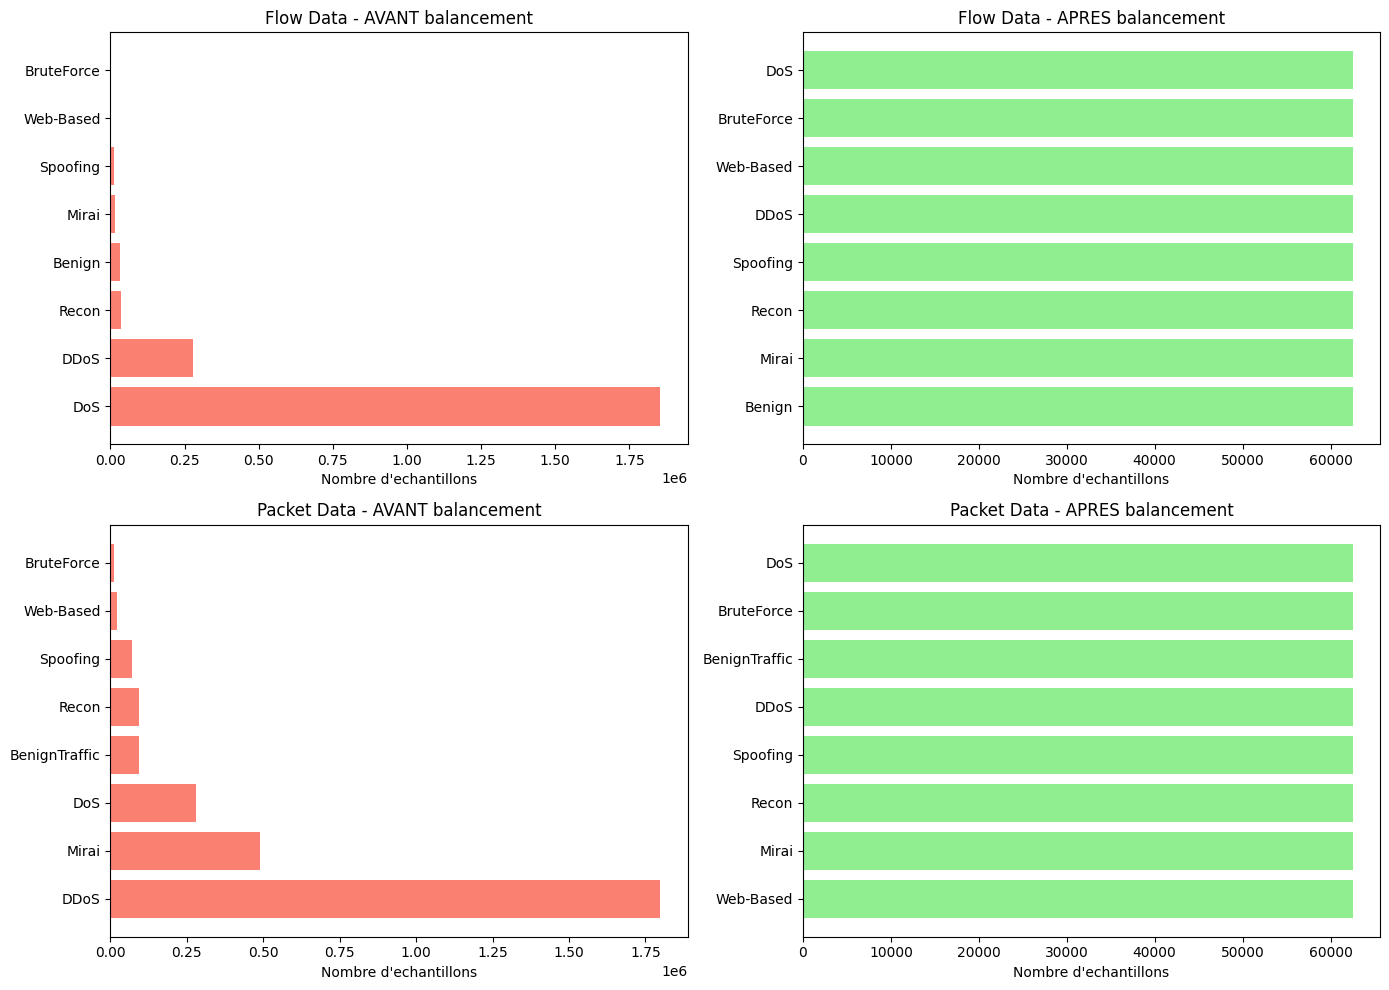

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flow Data - Avant
flow_original = flow_data['Main_Label'].value_counts()
axes[0, 0].barh(flow_original.index, flow_original.values, color='salmon')
axes[0, 0].set_title('Flow Data - AVANT balancement')
axes[0, 0].set_xlabel('Nombre d\'echantillons')

# Flow Data - Apres
flow_balanced = balanced_flow['Main_Label'].value_counts()
axes[0, 1].barh(flow_balanced.index, flow_balanced.values, color='lightgreen')
axes[0, 1].set_title('Flow Data - APRES balancement')
axes[0, 1].set_xlabel('Nombre d\'echantillons')

# Packet Data - Avant
packet_original = packet_data['Main_Label'].value_counts()
axes[1, 0].barh(packet_original.index, packet_original.values, color='salmon')
axes[1, 0].set_title('Packet Data - AVANT balancement')
axes[1, 0].set_xlabel('Nombre d\'echantillons')

# Packet Data - Apres
packet_balanced = balanced_packet['Main_Label'].value_counts()
axes[1, 1].barh(packet_balanced.index, packet_balanced.values, color='lightgreen')
axes[1, 1].set_title('Packet Data - APRES balancement')
axes[1, 1].set_xlabel('Nombre d\'echantillons')

plt.tight_layout()
plt.show()